In [47]:
import matplotlib.pyplot as plt

In [204]:
from PIL import Image
import numpy as np

def load_image( infilename ) :
    basewidth=255
    img = Image.open( infilename )
    img.load()
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), Image.ANTIALIAS)
    data = np.asarray( img, dtype="int32" ,)
    return data

def save_image( npdata, outfilename ) :
    img = Image.fromarray( np.asarray( np.clip(npdata,0,255), dtype="uint8"), "L" )
    img.save( outfilename )

In [205]:
import copy

l=[[0,3,0,0],
   [0,0,0,2],
   [1,0,0,0],
   [0,0,0,0]]
l=[[0,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,3,0,8,5],
   [0,0,1,0,2,0,0,0,0],
   [0,0,0,5,0,7,0,0,0],
   [0,0,4,0,0,0,1,0,0],
   [0,9,0,0,0,0,0,0,0],
   [5,0,0,0,0,0,0,7,3],
   [0,0,2,0,1,0,0,0,0],
   [0,0,0,0,4,0,0,0,9]]
l=[[0,4,0,2,0,1,0,6,0],
   [0,0,0,0,0,0,0,0,0],
   [9,0,5,0,0,0,3,0,7],
   [0,0,0,0,0,0,0,0,0],
   [5,0,7,0,8,0,1,0,4],
   [0,1,0,0,0,0,0,9,0],
   [0,0,1,0,0,0,6,0,0],
   [0,0,0,7,0,5,0,0,0],
   [6,0,8,9,0,4,5,0,3]]
l=[[1,0,0,0,7,0,0,3,0],
   [8,3,0,6,0,0,0,0,0],
   [0,0,2,9,0,0,6,0,8],
   [6,0,0,0,0,4,9,0,7],
   [0,9,0,0,0,0,0,5,0],
   [3,0,7,5,0,0,0,0,4],
   [2,0,3,0,0,9,1,0,0],
   [0,0,0,0,0,2,0,4,3],
   [0,4,0,0,8,0,0,0,9]]
l=[[5,3,0,0,7,0,0,0,0],
   [6,0,0,1,9,5,0,0,0],
   [0,9,8,0,0,0,0,6,0],
   [8,0,0,0,6,0,0,0,3],
   [4,0,0,8,0,3,0,0,1],
   [7,0,0,0,2,0,0,0,6],
   [0,6,0,0,0,0,2,8,0],
   [0,0,0,4,1,9,0,0,5],
   [0,0,0,0,8,0,0,7,9]]
n=len(l)

(255, 255)


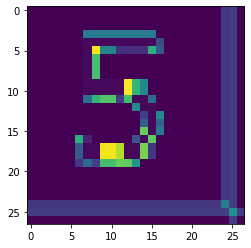

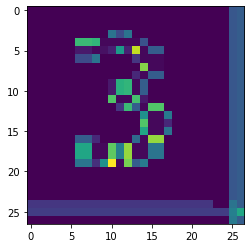

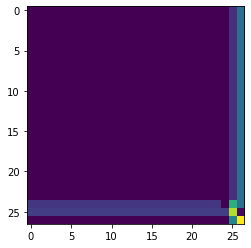

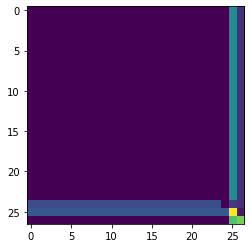

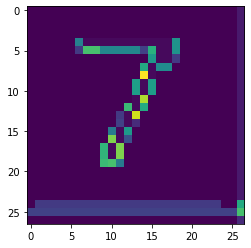

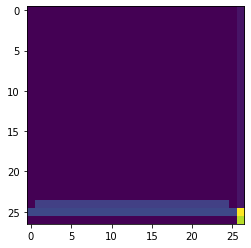

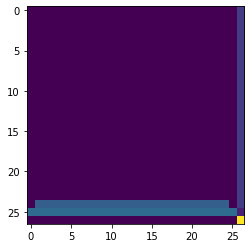

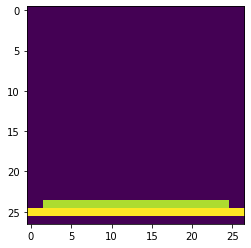

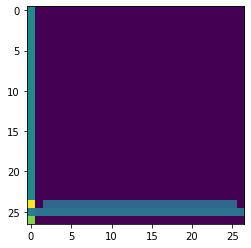

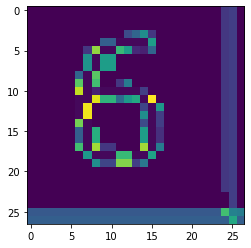

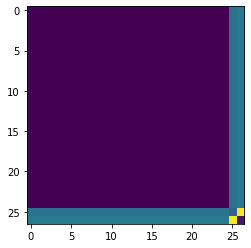

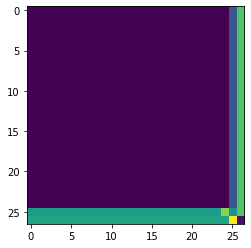

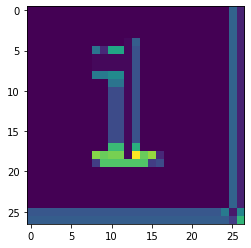

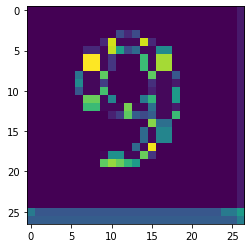

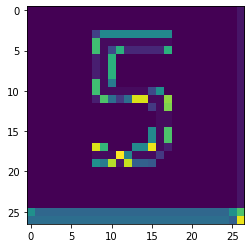

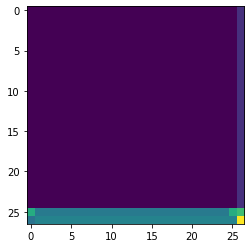

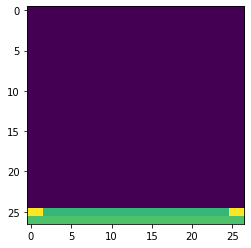

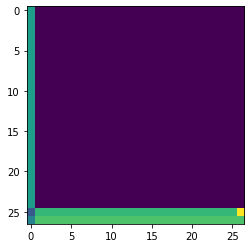

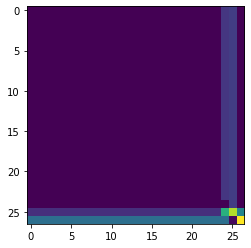

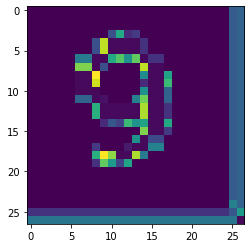

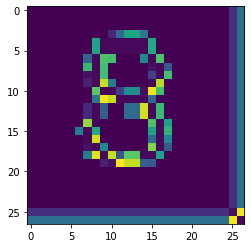

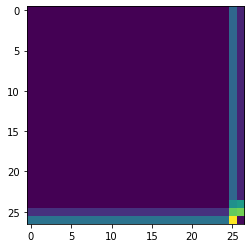

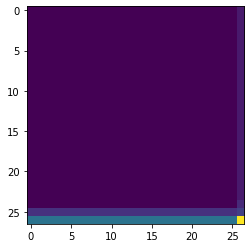

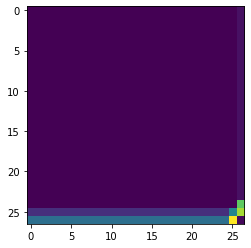

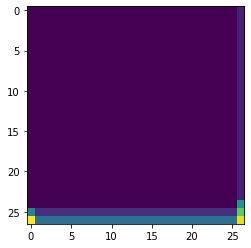

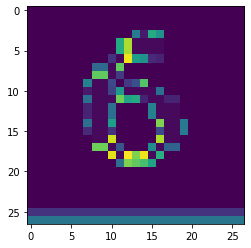

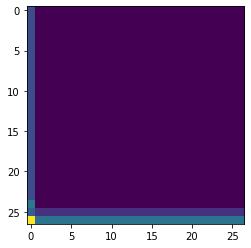

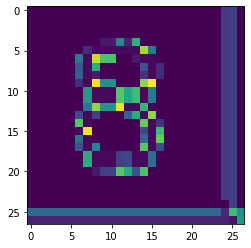

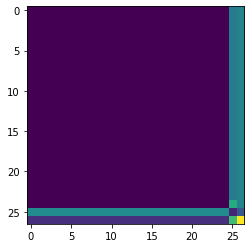

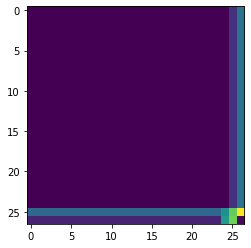

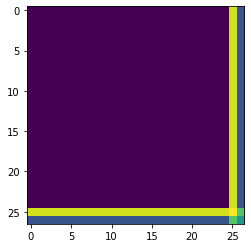

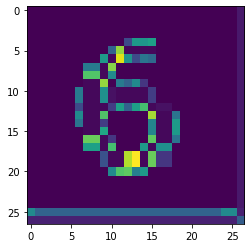

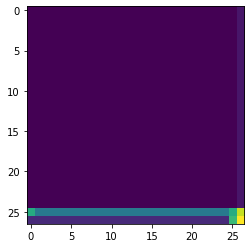

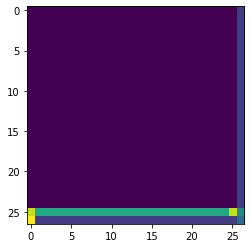

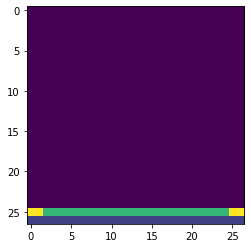

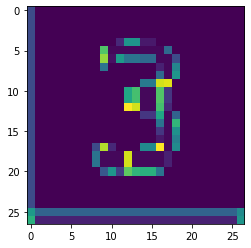

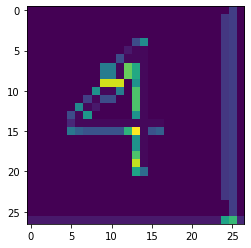

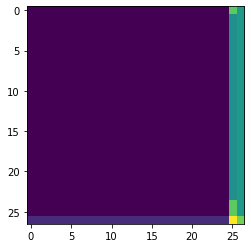

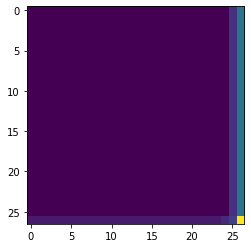

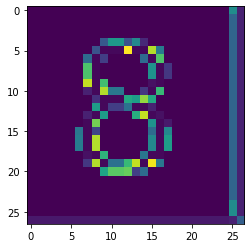

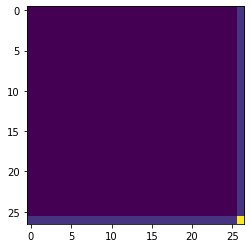

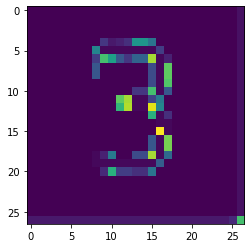

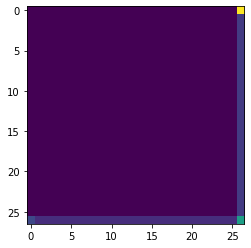

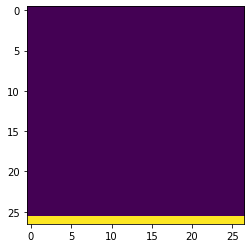

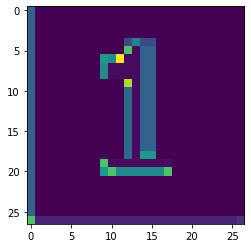

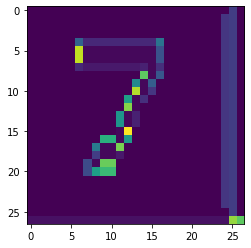

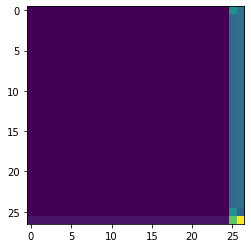

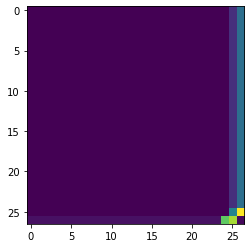

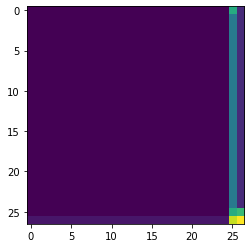

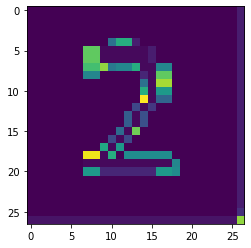

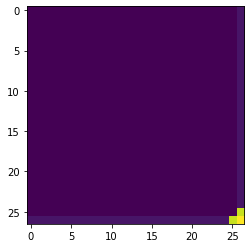

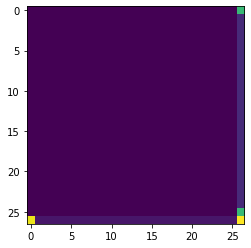

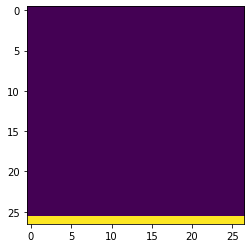

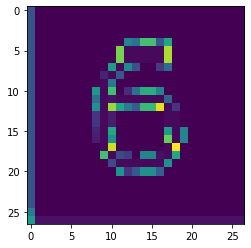

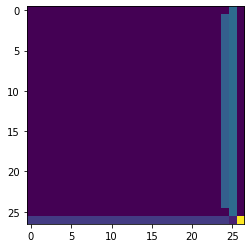

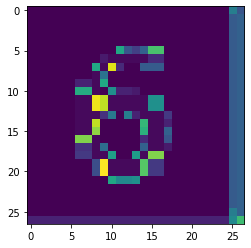

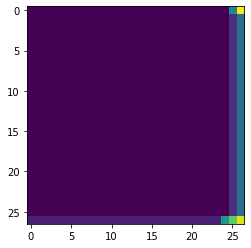

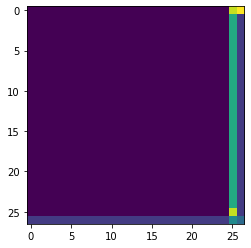

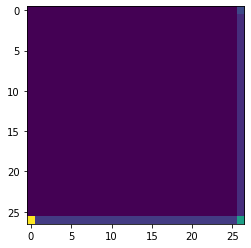

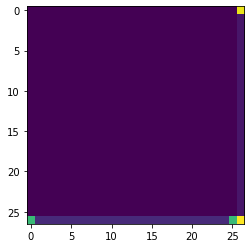

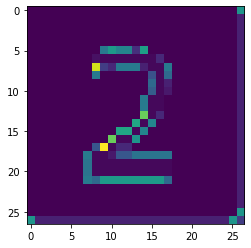

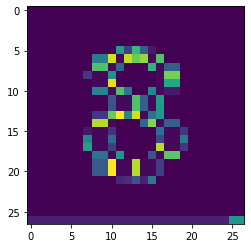

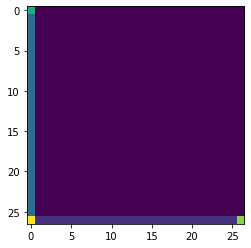

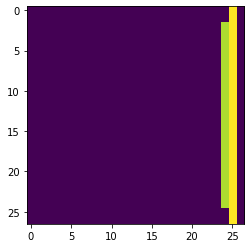

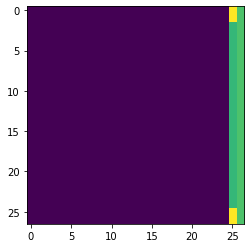

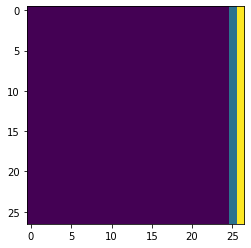

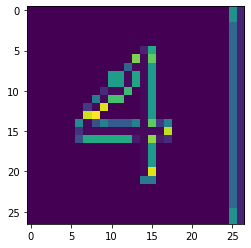

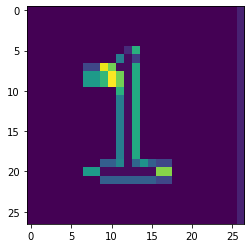

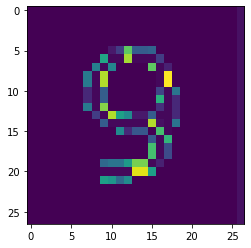

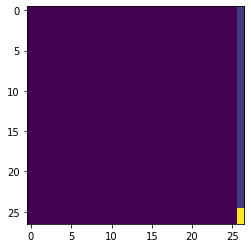

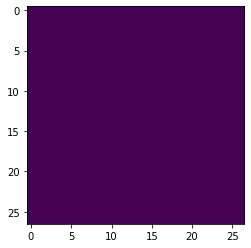

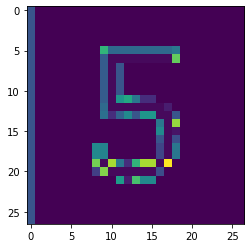

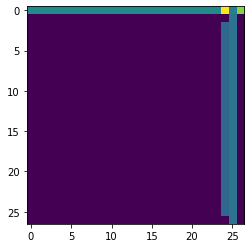

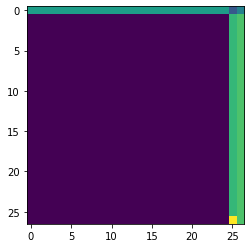

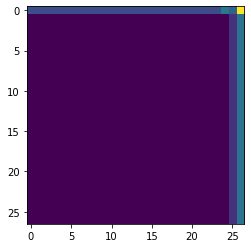

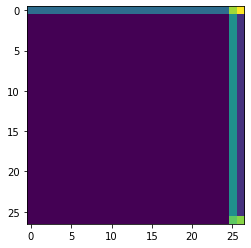

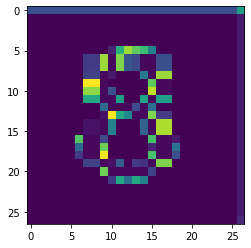

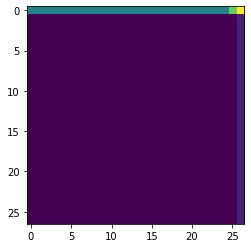

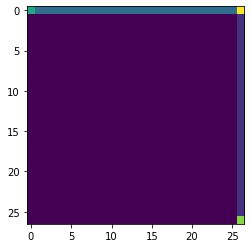

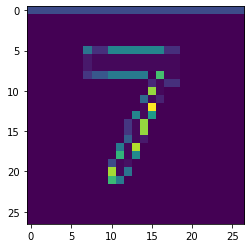

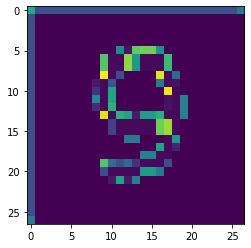

In [220]:
data=load_image("index.png")
print(data.shape)
plt.imshow(data)
X=[]
y=[]
for i in range(9):
    for j in range(9):
        data_temp=data[3+i*28:2+(i+1)*28,3+j*28:2+(j+1)*28]#[1+i*2+i*23:i*2+(i+1)*23,1+j*2+j*23:j*2+(j+1)*23]
        plt.imshow(data_temp)
        X.append(data_temp)
        y.append(l[i][j])
        plt.show()
X=np.array(X).reshape(81,-1)/255
y=np.array(y)

In [221]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver="lbfgs",multi_class="auto",max_iter=10000)
lr.fit(X,y)
l=lr.predict(X.reshape(81,-1)).reshape(9,9).tolist()

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [ ]:
l

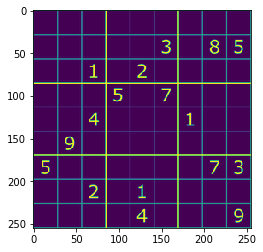

In [212]:
data=255-load_image("index2.png")[:,:,0]
plt.imshow(data)
X=[]
for i in range(9):
    for j in range(9):
        data_temp=data[3+i*28:2+(i+1)*28,3+j*28:2+(j+1)*28]
        #plt.imshow(data_temp)
        X.append(data_temp)
        #plt.show()
X=np.array(X).reshape(81,-1)
l=lr.predict(X.reshape(81,-1)).reshape(9,9).tolist()

In [213]:
l

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 3, 0, 8, 6],
 [0, 0, 1, 0, 8, 0, 0, 0, 0],
 [0, 0, 0, 8, 0, 8, 0, 0, 0],
 [0, 0, 4, 0, 0, 0, 1, 0, 0],
 [0, 8, 0, 0, 0, 0, 0, 0, 0],
 [8, 0, 0, 0, 0, 0, 0, 8, 8],
 [0, 0, 8, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 4, 0, 0, 0, 9]]

In [53]:

def print_sudoku(l):
    for i in range(len(l)):
        for j in range(len(l)):
            if j%int(len(l)**0.5)==0:
                print("  ",end="")
            print(l[i][j],"  ",end="")
        if (i+1)%int(len(l)**0.5)==0:
            print("\n")
        print("\n")

def place_probable(x,y,l):
    if l[x][y]!=0:
        return set([])
    p=list(range(1,n+1))
    p_r=[]
    for i in range(n):
        p_r.append(l[x][i])
        p_r.append(l[i][y])
    for i in range(0,n,int(n**0.5)):
        if i<=x and x<i+int(n**0.5):
            sub_x=i
        if i<=y and y<i+int(n**0.5):
            sub_y=i
    for i in range(sub_x,sub_x+int(n**0.5)):
        for j in range(sub_y,sub_y+int(n**0.5)):
            p_r.append(l[i][j])
    p_r=[i for i in range(1,n+1) if i not in p_r]
    return set(p_r)


def sudoku_checker(l):
    n=len(l)
    for x in range(n):
        for y in range(n):
            if l[x][y]==0:
                return False
    return True


def place_filler(l,give_l=True):
    n=len(l)
    for x in range(n):
        for y in range(n):
            if y%int(len(l)**0.5)==0:
                print("  ",end="")
            
            temp=place_probable(x,y,l)
            print(temp,end=" ")
            if len(temp)==1:
                l[x][y]=temp.pop()
                continue
            
            temp=place_probable(x,y,l)
            for j in range(n):
                if y!=j:
                    temp=temp-place_probable(x,j,l)
            if len(temp)==1:
                l[x][y]=temp.pop()
                continue
            
                
            temp=place_probable(x,y,l)
            for i in range(n):
                if x!=i:
                    temp=temp-place_probable(i,y,l)
            if len(temp)==1:
                l[x][y]=temp.pop()
                continue
            
            temp=place_probable(x,y,l)
            for i in range(0,n,int(n**0.5)):
                if i<=x and x<i+int(n**0.5):
                    sub_x=i
                if i<=y and y<i+int(n**0.5):
                    sub_y=i
            for i in range(sub_x,sub_x+int(n**0.5)):
                for j in range(sub_y,sub_y+int(n**0.5)):
                    if x!=i or y!=j:
                        temp=temp-place_probable(i,j,l)
            if len(temp)==1:
                l[x][y]=temp.pop()
                continue
        if (x+1)%int(len(l)**0.5)==0:
            print("\n")        
        print("\n")
    if(give_l):
        return l



In [54]:
print_sudoku(l)

  5   3   0     0   7   0     0   0   0   

  6   0   0     1   9   5     0   0   0   

  0   9   8     0   0   0     0   6   0   



  8   0   0     0   6   0     0   0   3   

  4   0   0     8   0   3     0   0   1   

  7   0   0     0   2   0     0   0   6   



  0   6   0     0   0   0     2   8   0   

  0   0   0     4   1   9     0   0   5   

  0   0   0     0   8   0     0   7   9   





In [55]:
while(True):
    temp_l=place_filler(copy.deepcopy(l))
    if(temp_l==l):
        print("can't go further")
        break
    else:
        l=temp_l
    print("\n\n")
print(sudoku_checker(l))

  set() set() {1, 2, 4}   {2, 6} set() {8, 2, 4, 6}   {1, 4, 9} {1, 2, 4, 9} {2, 4} 

  set() {2, 4, 7} {2, 4, 7}   set() set() set()   {8, 3, 4, 7} {2, 3, 4} {8, 2, 4, 7} 

  {1, 2} set() set()   {2, 3} {3, 4} {2}   {3, 5, 7} set() {7} 



  set() {1, 2, 5} {1, 2, 5, 9}   {9, 5, 7} set() {1, 4, 7}   {9, 4, 7} {9, 2, 4, 5} set() 

  set() {2, 5} {9, 2, 5, 6}   set() {5} set()   {9, 7} {9, 2} set() 

  set() {1, 5} {1, 3, 5, 9}   {9} set() {1, 4}   {8, 4} {4, 5} set() 



  {9, 3} set() {1, 4, 5, 7}   {3, 5, 7} {3} {7}   set() set() {4} 

  {2, 3} {8, 2, 7} {2, 7}   set() set() set()   {3, 6} {3} set() 

  {2, 3} {2, 4, 5} {2, 4, 5}   {2, 6} set() {6}   {1} set() set() 






  set() set() {2, 4}   {6} set() set()   {9, 4} set() {2} 

  set() {2, 4, 7} {2, 4}   set() set() set()   {3, 4} {4} set() 

  set() set() set()   {3} set() set()   set() set() set() 



  set() {1, 2, 5} {9, 5}   {7} set() {1, 4}   {4} {2, 5} set() 

  set() {2} set()   set() set() set()   set() set() set() 

  s

In [56]:
print_sudoku(l)

  5   3   4     6   7   8     9   1   2   

  6   7   2     1   9   5     3   4   8   

  1   9   8     3   4   2     5   6   7   



  8   5   9     7   6   1     4   2   3   

  4   2   6     8   5   3     7   9   1   

  7   1   3     9   2   4     8   5   6   



  9   6   1     5   3   7     2   8   4   

  2   8   7     4   1   9     6   3   5   

  3   4   5     2   8   6     1   7   9   



